In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
df = pd.read_csv('data/gender_equality_japanese_workplace_eng.csv', header=1)
total = len(df)

In [71]:
percentage = lambda x, y: x / y * 100

def response_convert(r):
    if r == 'agree':
        return 1
    elif r == 'disagree':
        return 0
    else:
        return r

In [72]:
df.head()

,Age,My current job requires a degree or is skilled work.,There are more women in my workplace than men.,My boss is male.,The treatment between men and women in my workplace is not equal.,I feel disadvantaged because I am female.,There are things I have to do as a female that males do not.,As a female there are things I can not do that males can.,I would like to do a managerial job.,I will quit work when I marry/When I married I quit work.,My workplace offers maternity leave.,My workplace offers maternity leave to not just women but men too.,I feel that there is pressure for women to quit work once married.
0,40-49,disagree,disagree,disagree,disagree,agree,agree,disagree,agree,disagree,agree,agree,disagree
1,20-29,disagree,disagree,agree,disagree,disagree,agree,disagree,agree,disagree,agree,agree,disagree
2,20-29,disagree,agree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,agree,disagree,disagree
3,50~,agree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree,disagree
4,30-39,agree,disagree,agree,agree,agree,agree,disagree,agree,disagree,disagree,disagree,agree


In [73]:
df.describe()

,Age,My current job requires a degree or is skilled work.,There are more women in my workplace than men.,My boss is male.,The treatment between men and women in my workplace is not equal.,I feel disadvantaged because I am female.,There are things I have to do as a female that males do not.,As a female there are things I can not do that males can.,I would like to do a managerial job.,I will quit work when I marry/When I married I quit work.,My workplace offers maternity leave.,My workplace offers maternity leave to not just women but men too.,I feel that there is pressure for women to quit work once married.
count,51,51,51,51,51,51,51,51,51,51,51,51,51
unique,5,2,2,2,2,2,2,2,2,2,2,2,2
top,20-29,agree,disagree,agree,disagree,disagree,disagree,disagree,disagree,disagree,agree,agree,disagree
freq,19,28,26,31,35,38,28,40,32,45,44,27,32


In [74]:
df.columns = ['Age', 'Skilled', 'More Women', 'Male Boss', 'Unequal', 'Disadvantaged',
              'Female Tasks', 'Male Tasks', 'Managerial', 'Quit', 'Maternity',
              'Male Maternity', 'Pressure']

age_col = df.pop('Age')
df = df.applymap(response_convert).astype(float)
df['Age'] = pd.Series(age_col, index=df.index)

df.head()

,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,40-49
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,20-29
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20-29
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50~
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39


## Equal Sample

In [75]:
df_equal = df.loc[df['Unequal'] == 0, ['Female Tasks', 'Male Maternity', 'Pressure']]
total_equal = len(df_equal)

print('% Equal: {0}'.format(percentage(total_equal, total)))

df_equal.head()

% Equal: 68.62745098039215


,Female Tasks,Male Maternity,Pressure
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
5,1.0,1.0,1.0


In [76]:
equal = len(df_equal.loc[(df_equal['Female Tasks'] == 0) & 
       (df_equal['Male Maternity'] == 1) & 
       (df_equal['Pressure'] == 0)])

print("Entries: {0} | Equal: {1} | % True Equal: {2}".format(total_equal, equal, percentage(equal, total_equal)))

Entries: 35 | Equal: 11 | % True Equal: 31.428571428571427


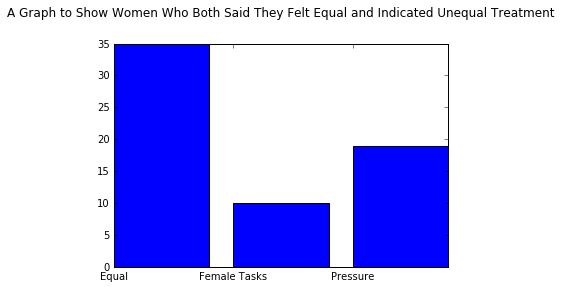

In [97]:
y = [total_equal, df_equal['Female Tasks'].sum(), df['Pressure'].sum()]
x = [0, 1, 2]
x_labels = ['Equal', 'Female Tasks', 'Pressure']

fig = plt.figure()
ax = plt.subplot(111)
plt.xticks(x, x_labels)
ax.bar(x, y, width=0.8)
plt.title("A Graph to Show Women Who Both Said They Felt Equal and Indicated Unequal Treatment", y=1.1)

## Unequal Sample

In [77]:
df_unequal = df.loc[df['Unequal'] == 1, ['Female Tasks', 'Male Maternity', 'Pressure']]
total_unequal = len(df_unequal)

print('% Unequal: {0}'.format(percentage(total_unequal, total)))

df_unequal.head()

% Unequal: 31.372549019607842


,Female Tasks,Male Maternity,Pressure
4,1.0,0.0,1.0
8,1.0,0.0,1.0
9,1.0,1.0,1.0
10,1.0,0.0,1.0
11,1.0,0.0,0.0


In [78]:
female_tasks = percentage(df_unequal['Female Tasks'].value_counts()[1], total_unequal)
male_maternity = percentage(df_unequal['Male Maternity'].value_counts()[0], total_unequal)
pressure = percentage(df_unequal['Pressure'].value_counts()[1], total_unequal)
print("Female Tasks: {0} | Male Maternity: {1} | Pressure {2}".format(female_tasks, male_maternity, pressure))

Female Tasks: 81.25 | Male Maternity: 56.25 | Pressure 56.25


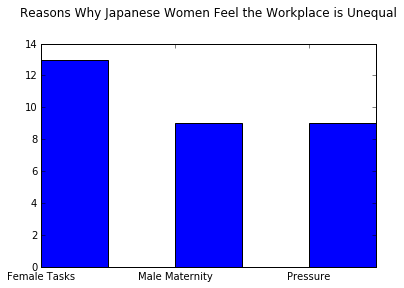

In [79]:
y = [df_unequal['Female Tasks'].sum(), df_unequal['Pressure'].sum(), 
        total_unequal - df_unequal['Male Maternity'].sum()]
x=[0, 1, 2]
x_labels = df_unequal.columns.values

fig = plt.figure()
ax = plt.subplot(111)
plt.xticks(x, x_labels)
ax.bar(x, y, width=0.5)
plt.title("A Graph to Show Reasons Why Japanese Women Feel the Workplace is Unequal", y=1.1)

## Skilled Sample

In [80]:
skilled = df.loc[df['Skilled'] == 1]
total_skilled = len(skilled)

print('% Skilled: {0}'.format(percentage(total_skilled, total)))

skilled.head()

% Skilled: 54.90196078431373


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50~
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39
5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,20-29
8,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,~19
14,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,50~


In [81]:
skilled_unequal = df.loc[(df['Skilled'] == 1) & (df['Unequal'] == 1)]
total_skilled_unequal = len(skilled_unequal)

print('% Skilled, Unequal: {0}'.format(percentage(total_skilled_unequal, total_skilled)))

skilled_unequal.head()

% Skilled, Unequal: 25.0


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39
8,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,~19
14,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,50~
16,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,30-39
20,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20-29


In [82]:
skilled_pressure = df.loc[(df['Skilled'] == 1) & (df['Pressure'] == 1)]
total_skilled_pressure = len(skilled_pressure)

print('% Skilled, Pressure: {0}'.format(percentage(total_skilled_pressure, total_skilled)))

skilled_pressure.head()

% Skilled, Pressure: 32.142857142857146


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39
5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,20-29
8,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,~19
17,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,20-29
26,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,50~


In [83]:
skilled_disadv = df.loc[(df['Skilled'] == 1) & (df['Disadvantaged'] == 1)]
total_skilled_disadv = len(skilled_disadv)

print('% Skilled, Disadvantaged: {0}'.format(percentage(total_skilled_disadv, total_skilled)))

skilled_disadv.head()

% Skilled, Disadvantaged: 10.714285714285714


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,30-39
32,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40-49
40,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,50~


## Unskilled sample

In [107]:
unskilled = df.loc[df['Skilled'] == 0]
total_unskilled = len(unskilled)

print('% Unskilled: {0}'.format(percentage(total_unskilled, total)))

unskilled.head()

% Unskilled: 45.09803921568628


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,40-49
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,20-29
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20-29
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20-29
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,20-29


In [106]:
unskilled_unequal = df.loc[(df['Skilled'] == 0) & (df['Unequal'] == 1)]
total_unskilled_unequal = len(unskilled_unequal)

print('% Unskilled, Equal: {0}'.format(percentage(total_unskilled_unequal, total_unskilled)))

unskilled_unequal.head()

% Unskilled, Equal: 39.130434782608695


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
9,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,20-29
10,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,30-39
11,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,20-29
12,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,40-49
27,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50~


In [104]:
unskilled_pressure = df.loc[(df['Skilled'] == 0) & (df['Pressure'] == 1)]
total_unskilled_pressure = len(unskilled_pressure)

print('% Unskilled, Pressure: {0}'.format(percentage(total_unskilled_pressure, total_unskilled)))

unskilled_pressure.head()

% Unskilled, Pressure: 43.47826086956522


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,20-29
9,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,20-29
10,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,30-39
12,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,40-49
13,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,20-29


In [112]:
unskilled_disadv = df.loc[(df['Skilled'] == 0) & (df['Disadvantaged'] == 1)]
total_unskilled_disadv = len(unskilled_disadv)

print('% Unskilled, Disadvantaged: {0}'.format(percentage(total_unskilled_disadv, total_unskilled)))

unskilled_disadv.head()

% Unskilled, Disadvantaged: 43.47826086956522


,Skilled,More Women,Male Boss,Unequal,Disadvantaged,Female Tasks,Male Tasks,Managerial,Quit,Maternity,Male Maternity,Pressure,Age
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,40-49
10,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,30-39
12,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,40-49
15,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,20-29
18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40-49
